In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [7]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Embedding(input_dim=9,output_dim=1))

In [11]:
model.add(LSTM(2))

In [12]:
model.add(Dense(1, activation = "sigmoid"))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1)           9         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 3s - loss: 0.6921 - acc: 0.5677 - val_loss: 0.6852 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6897 - acc: 0.5871 - val_loss: 0.6766 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6874 - acc: 0.5871 - val_loss: 0.6686 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6855 - acc: 0.5871 - val_loss: 0.6590 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.6834 - acc: 0.5871 - val_loss: 0.6508 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.6817 - acc: 0.5871 - val_loss: 0.6432 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.6805 - acc: 0.5871 - val_loss: 0.6332 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.6792 - acc: 0.5871 - val_loss: 0.6271 - val_acc: 0.7885
Epoch 9/30
 - 1s - loss: 0.6784 - acc: 0.5871 - val_loss: 0.6222 - val_acc: 0.7885
Epoch 10/30
 - 1s - loss: 0.6778 - acc: 0.5871 - val_loss: 0.6159 - val_acc: 0.7885
Epoch 11/30
 - 1s - loss: 0.6774 - acc: 0.5871 - val_loss: 0.6100 - val_acc: 0.7885
Epoch 12/30
 - 0s - loss: 0.6770 - acc:

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

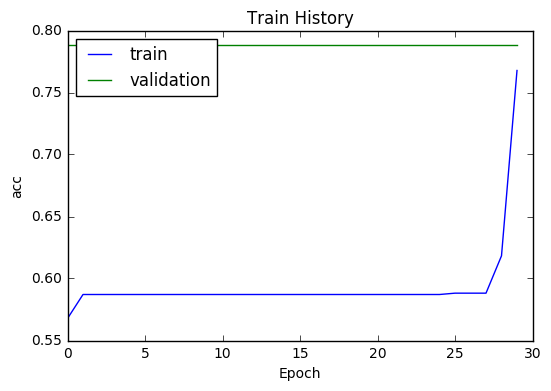

In [17]:
show_train_history(train_history,'acc','val_acc')

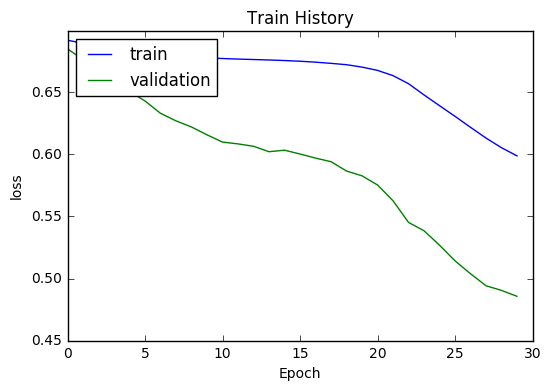

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 86us/step


In [20]:
scores[1]

0.7927272731607611

In [21]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [22]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [23]:
all_df=pd.concat([all_df,JR_df])

In [24]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [25]:
all_Features,Label=PreprocessData(all_df)

In [26]:
all_probability=model.predict(all_Features)

In [27]:
all_probability[:10]

array([[0.5194754 ],
       [0.41094708],
       [0.5194754 ],
       [0.41094708],
       [0.5194754 ],
       [0.41094708],
       [0.5194754 ],
       [0.41094708],
       [0.5194754 ],
       [0.39303467]], dtype=float32)

In [28]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

In [29]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.234997
1,1,Rose,1,female,20.0,1,0,100.0,S,0.519475


In [30]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability


In [31]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.519475
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.410947
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.519475
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.410947
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.519475
